# Upvote Dataset 
To predict the number of upvotes a post on social media can get

## Importing the required libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor

In [54]:
data= pd.read_csv("train_NIR5Yl1.csv")

In [55]:
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [56]:
data.shape

(330045, 7)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


# Checking for Null Values

In [58]:
find_null= pd.isnull(data).sum()
find_null[find_null>0]

Series([], dtype: int64)

# Dropping the ID *Column*

In [59]:
data.drop(['ID'],axis=1,inplace=True)

# Checking the Skewness

In [60]:
data.skew()

Reputation    11.230027
Answers        3.380169
Username       0.142088
Views         14.370704
Upvotes       74.249689
dtype: float64

# Dropping the Username Column

In [61]:
data.drop(['Username'],axis=1,inplace=True)

# Rectifying the Skewness

In [62]:
data['Reputation']=(data['Reputation'])**(1/3)

In [63]:
data['Reputation'].skew()

1.8508763961694898

In [64]:
data['Answers']=(data['Answers'])**(1/3)

In [65]:
data['Answers'].skew()

0.5424660030490057

In [66]:
data['Views']=(data['Views'])**(1/3)

In [67]:
data['Views'].skew()

1.501734709364565

## Checking Correlation between Features

In [68]:
Matrix= data.corr()
Matrix

,Reputation,Answers,Views,Upvotes
Reputation,1.000000,0.165482,0.136000,0.217233
Answers,0.165482,1.000000,0.590185,0.148472
Views,0.136000,0.590185,1.000000,0.245422
Upvotes,0.217233,0.148472,0.245422,1.000000


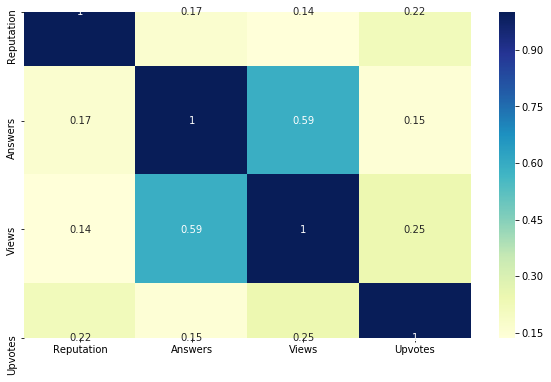

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(Matrix,annot=True,cmap="YlGnBu")

# Converting Categorical to Numerical Data

In [70]:
data= pd.get_dummies(data)
data.head()

,Reputation,Answers,Views,Upvotes,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,15.796912,1.259921,19.878429,42.0,1,0,0,0,0,0,0,0,0,0
1,29.642422,2.289428,38.213252,1175.0,1,0,0,0,0,0,0,0,0,0
2,11.073883,1.587401,20.055678,60.0,0,1,0,0,0,0,0,0,0,0
3,6.415069,1.442250,30.023685,9.0,1,0,0,0,0,0,0,0,0,0
4,16.224694,1.587401,24.093386,83.0,0,1,0,0,0,0,0,0,0,0


In [71]:
Y=data[['Upvotes']]
data.drop(['Upvotes'],axis=1,inplace=True)

# Normalization

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()  #Object is created
sc_data=sc.fit_transform(data)
sc_data=pd.DataFrame(sc_data)
sc_data.columns=data.columns
sc_data.head()

,Reputation,Answers,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,0.271704,-0.529768,-0.259134,3.068087,-0.530373,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
1,1.687020,2.054293,1.087086,3.068087,-0.530373,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
2,-0.211093,0.292206,-0.246119,-0.325936,1.885466,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
3,-0.687327,-0.072124,0.485773,3.068087,-0.530373,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
4,0.315433,0.292206,0.050346,-0.325936,1.885466,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967


# Splitting into Test & Train

In [73]:
X=sc_data
X

,Reputation,Answers,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,0.271704,-0.529768,-0.259134,3.068087,-0.530373,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
1,1.687020,2.054293,1.087086,3.068087,-0.530373,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
2,-0.211093,0.292206,-0.246119,-0.325936,1.885466,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
3,-0.687327,-0.072124,0.485773,3.068087,-0.530373,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
4,0.315433,0.292206,0.050346,-0.325936,1.885466,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330040,-1.005558,-0.529768,-0.969343,-0.325936,1.885466,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
330041,-0.135409,-0.529768,0.379004,-0.325936,1.885466,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
330042,0.532599,-0.529768,-0.728456,-0.325936,1.885466,-0.257773,-0.329931,-0.529313,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967
330043,-0.886693,-0.529768,-0.777393,-0.325936,-0.530373,-0.257773,-0.329931,1.889242,-0.21472,-0.389146,-0.197926,-0.275753,-0.146967


In [74]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3,random_state=0)

# Linear Regression

In [75]:
reg= LinearRegression()
reg=reg.fit(x_train,y_train)
print('Coeff: ',reg.coef_)
print('Intercept: ',reg.intercept_)

Coeff:  [[ 7.07556821e+02 -6.27936833e+01  8.72057837e+02  1.03624943e+14
   1.45583128e+14  8.50113080e+13  1.04647223e+14  1.45419662e+14
   7.21899416e+13  1.18864638e+14  6.69874278e+13  9.01302499e+13
   5.05961751e+13]]
Intercept:  [342.81361274]


In [76]:
y_pred=reg.predict(x_test)

In [77]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
lin_r2= r2_score(y_test,y_pred)
print("Regressor Score =",lin_r2)

RMSE= 2435.4169209516326
Regressor Score = 0.1409812536401932


Text(0.5, 1.0, 'Residual Plot')

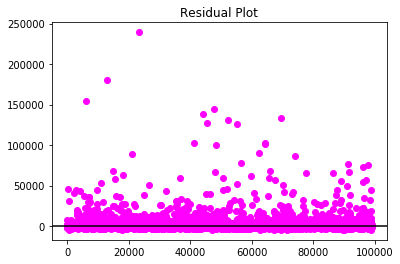

In [78]:
#Residual Plot

x=[i for i in range(1,len(y_pred)+1)]

x_plot= plt.scatter(x,(y_test-y_pred),color='magenta')
plt.axhline(y=0,color='black')  #plt.plot(x,[0]*len(y_pred),color='black')  
plt.title('Residual Plot')

# Ridge Regression

In [79]:
ridgeReg= Ridge(alpha=0.1, normalize=True)
ridgeReg.fit(x_train,y_train)
print('Ridge Regression Coeff: ',ridgeReg.coef_)
print('Ridge Regression Intercept: ',ridgeReg.intercept_)

Ridge Regression Coeff:  [[645.3935002   11.11976805 757.56990261 -20.85035673 -25.24676126
   22.32523773  -6.29353874 -11.45341763   1.13779986   6.38202276
   39.97865917  22.78754558  13.47818979]]
Ridge Regression Intercept:  [342.85161865]


In [80]:
y_pred=ridgeReg.predict(x_test)

In [81]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
ridge_r2= r2_score(y_test,y_pred)
print("Regressor Score =",ridge_r2)

RMSE= 2431.901137335947
Regressor Score = 0.14345963347960644


# Lasso Regression

In [82]:
lassoReg= Lasso(alpha=0.05, normalize= True)  
lassoReg.fit(x_train,y_train)
print('Lasso Regression Coeff: ',lassoReg.coef_)
print('Lasso Regression Intercept: ',lassoReg.intercept_)

Lasso Regression Coeff:  [678.87803252  -4.88488312 810.11486278  -0.          -4.79465712
   4.86734982  -0.          -0.           0.           0.
  26.91180533   7.78683005   0.        ]
Lasso Regression Intercept:  [342.85124364]


In [83]:
y_pred=lassoReg.predict(x_test)

In [84]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
lasso_r2= r2_score(y_test,y_pred)
print("Regressor Score =",lasso_r2)

RMSE= 2434.391418614869
Regressor Score = 0.14170453042667008


# Random Forest Regressor

In [85]:
rfReg=RandomForestRegressor()
rfReg.fit(x_train,y_train)
y_pred= rfReg.predict(x_test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [86]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
RF_r2= r2_score(y_test,y_pred)
print("Regressor Score =",RF_r2)

RMSE= 839.5913998071231
Regressor Score = 0.897907940263454


# AdaBoostRegressor

In [87]:
AdaBoostReg= AdaBoostRegressor(n_estimators=20)
AdaBoostReg.fit(x_train,y_train)
y_pred= AdaBoostReg.predict(x_test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
Ada_r2= r2_score(y_test,y_pred)
print("Regressor Score =",Ada_r2)

RMSE= 1663.371697160471
Regressor Score = 0.5992859054826024


# Bagging Regressor

In [89]:
BagReg= BaggingRegressor()
BagReg.fit(x_train,y_train)
y_pred=BagReg.predict(x_test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [90]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
Bag_r2= r2_score(y_test,y_pred)
print("Regressor Score =",Bag_r2)

RMSE= 966.093865400653
Regressor Score = 0.8648255372780134


# Bayesian Ridge

In [91]:
BayRidge= BayesianRidge()
BayRidge.fit(x_train,y_train)
y_pred=BayRidge.predict(x_test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
Bay_r2= r2_score(y_test,y_pred)
print("Regressor Score =",Bay_r2)

RMSE= 2435.376771422158
Regressor Score = 0.14100957644101675


# Huber Regression

In [93]:
hubReg= HuberRegressor()
hubReg.fit(x_train,y_train)
y_pred= hubReg.predict(x_test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
Hub_r2= r2_score(y_test,y_pred)
print("Regressor Score =",Hub_r2)

RMSE= 2597.406070788133
Regressor Score = 0.022907441374019677


## Model Comparison

In [111]:
Model_comparison=pd.DataFrame([lin_r2,ridge_r2,lasso_r2,RF_r2,Ada_r2,Bag_r2,Bay_r2,Hub_r2],['Linear','Ridge','Lasso','RandomForest','AdaBoost','Bagging','Bayesian','Huber'])
Model_comparison.columns=['Regressor Score']
Model_comparison

,Regressor Score
Linear,0.140981
Ridge,0.143460
Lasso,0.141705
RandomForest,0.897908
AdaBoost,0.599286
Bagging,0.864826
Bayesian,0.141010
Huber,0.022907


Text(0.5, 1.0, 'Model Comparison')

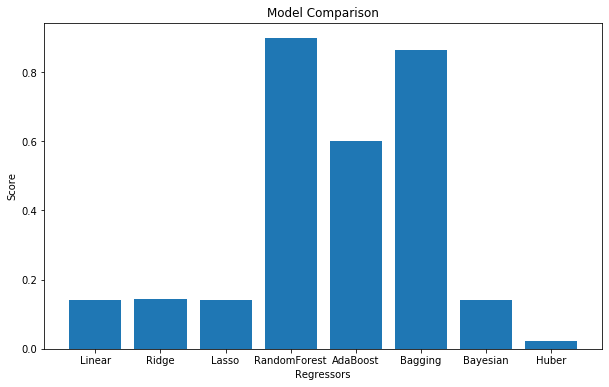

In [114]:
plt.figure(figsize=(10,6))
plt.bar(Model_comparison.index,Model_comparison['Regressor Score'])
plt.xlabel('Regressors')
plt.ylabel('Score')
plt.title('Model Comparison')

#### After checking all the models we have got the best accuracy with RandomForest Regressor, hence we will predict the number of Upvotes using RandomForest Regressor

In [97]:
test= pd.read_csv("test_8i3B3FC.csv")

In [98]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [99]:
test.drop(['ID','Username'],axis=1,inplace=True)

In [100]:
test.skew()

Reputation    11.318536
Answers        3.398091
Views         13.532848
dtype: float64

In [101]:
test['Reputation']=(test['Reputation'])**(1/3)
test['Answers']=(test['Answers'])**(1/3)
test['Views']=(test['Views'])**(1/3)

In [102]:
test.skew()

Reputation    1.872914
Answers       0.551302
Views         1.498699
dtype: float64

In [103]:
test=pd.get_dummies(test)
test.head()

,Reputation,Answers,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,17.805519,1.442250,32.140012,1,0,0,0,0,0,0,0,0,0
1,29.048275,1.817121,13.976150,0,1,0,0,0,0,0,0,0,0
2,9.750493,1.000000,27.662182,0,0,0,1,0,0,0,0,0,0
3,2.758924,1.817121,26.461199,0,0,0,1,0,0,0,0,0,0
4,16.479006,2.154435,38.538950,0,0,0,1,0,0,0,0,0,0


In [104]:
test=sc.fit_transform(test)

In [106]:
prediction= rfReg.predict(test)

In [107]:
pred=pd.DataFrame(prediction)

In [108]:
test= pd.read_csv("test_8i3B3FC.csv")
Submission1=pd.concat((test['ID'],pred),axis=1)
Submission1.columns=['ID','Upvotes']
Submission1.set_index(['ID'],inplace=True)

In [109]:
Submission1.to_csv("Submission1.csv")